<a href="https://colab.research.google.com/github/sooonsyk/ESAA/blob/main/Week16_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**차원 축소**
##**차원 축소 개요**
- 차원 축소 : 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
  - 일반적으로 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고, sparse한 구조를 가지게 됨 
  - 수백 개 이상의 피처로 구성된 데이터 세트의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도 떨어짐, 피처가 많을 경우 개별 피처 간에 상관관계가 높을 가능성 큼
- 피처 선택과 피처 추출로 나눔
  - 피처 선택 : 특성 선택, 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고 데이터의 특징을 잘 나타내는 주요 피처만 선택
  - 피처 추출 : 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것, 기존 피처를 단순 압축이 아닌 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것
    - 기존 피처가 전혀 인지하기 어려웠던 잠재적인 요소를 추출하는 것
- 차원 축소는 단순히 데이터의 압축을 의미하는 것이 아님, 더 중요한 의미는 차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 데 있음
- 매우 많은 픽셀로 이루어진 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축 수행 가능
- 문서 내 단어들의 구성에서 숨겨져 있는 시맨틱 의미나 토픽을 잠재 요소로 간주하고 이를 찾아낼 수 있음

##**PCA(Principal Component Analysis)**
###**PCA 개요**
- PCA : 가장 대표적인 차원 축소 기법, 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
  - 기존 데이터의 정보 유실이 최소화 되는 것이 당연
  - 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데 이것이 PCA의 주성분이 됨 - 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주
  -  가장 큰 데이터 변동성을 기반으로 첫번째 축을 생성하고, 두 번째 축은 이 벡터 축에 직각이 되는 벡터를 축으로 함, 세 번째 축은 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축 생성
  - 만들어진 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소됨
  - 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석
  - 선형대수 관점에서 해석하면, 입력 데이터의 공분산 행렬을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것 - 고유 벡터가 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타냄, 고윳값은 고유 벡터의 크기와 입력 데이터의 분산 나타냄
  - 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식
  1. 입력데이터 세트의 공분산 행렬 생성
  2. 공분산 행렬의 고유벡터와 고유값을 계산
  3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유 벡터 추출
  4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력된 데이터 변환

In [ ]:
#iris 데이터 4개의 속성을 2개의 PCA 차원으로 압축
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
#넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


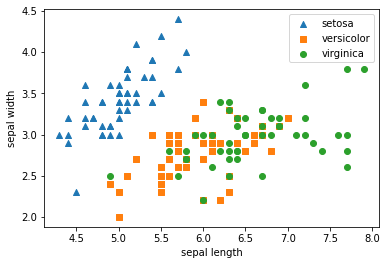

In [ ]:
#각 품종에 따라 원본 붓꽃 데이터 세트가 어떻게 분포돼있는지 2차원으로 시각화
#setosa는 세모, versicolor는 네모, virginica는 동그라미로
markers = ['^','s','o']

#setosa의 target 값은 0, versicolor는 1, virginica 2, 각 target 별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

- PCA 는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향 받음
- 여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환 필요

In [ ]:
from sklearn.preprocessing import StandardScaler

#Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표쥰 정규 분포를 가지는 값들로 변환 
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [ ]:
from sklearn.decomposition import PCA 

#n_components 는 PCA로 변환 할 차원의 수
pca = PCA(n_components=2) 

#fit()과 transform()을 호출해 PCA 변환 데이터 변환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [ ]:
#PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


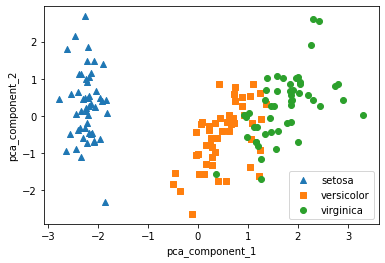

In [ ]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로
markers = ['^','s','o']

#pca_component_1 을 x축, pca_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
  x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [ ]:
#PCA 객체의 explained_variance_ratio_ 속성은 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율 제공
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [ ]:
pca_X = irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도 :', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도 : [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


- 원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수밖에 없음

In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#header로 의미 없는 첫 행 제거, iloc으로 기존 id 제거
import pandas as pd

df = pd.read_excel('credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)


(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


- default payment next month 속성이 Target 값으로 다음달 연체 여부 의미, 연체일 경우 1, 정상납부가 0


In [ ]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

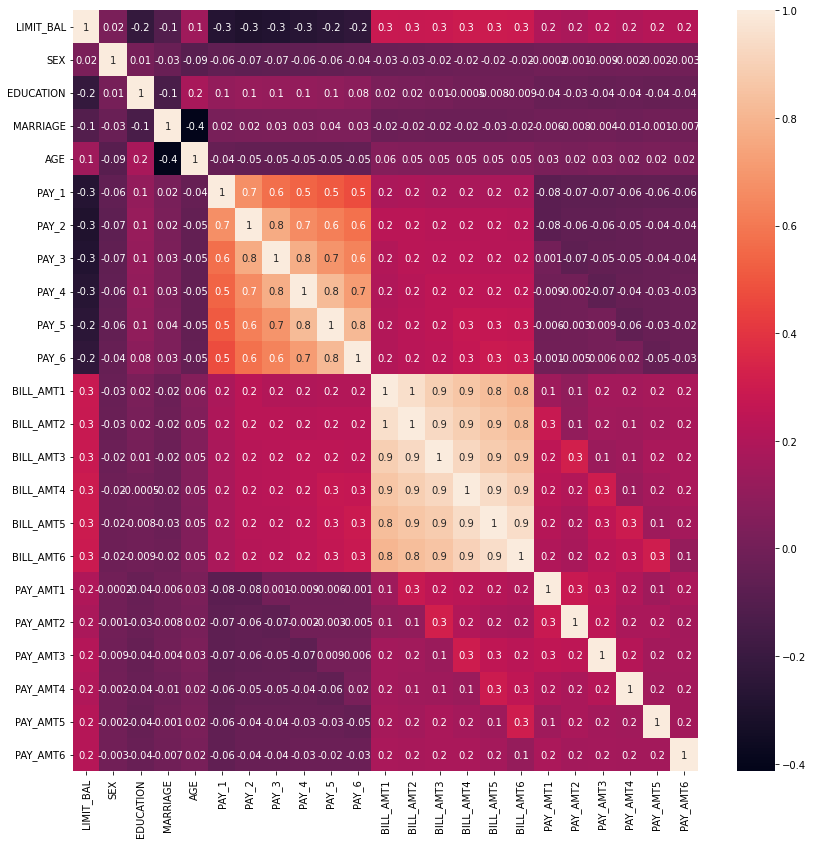

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

#2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit()호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성 :', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성 : [0.90555253 0.0509867 ]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)
print('CV=3 인 경우의 개별 Fold세트별 정확도:', scores)
print('평균 정확도:{0.4f}', np.mean(scores))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:{0.4f} 0.8170333333333333


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#원본 데이터 세트에 먼저 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

#6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy',cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7922 0.796  0.8028]
PCA 변환 데이터 세트 평균 정확도:0.7970


##**LDA(Linear Discriminant Analysis)**
###**LDA 개요**
- LDA : 선형 판별 분석법, 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소, 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음
- 클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원을 축소함 - 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산의 최대한 작게 가져가는 방식
1. 클래스 내부와 클래스 간 분산 행렬 구함, 이 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터를 기반으로 구함
2. 클래스 내부 분산 행렬을 $S_W$, 클래스 간 분산 행렬을 $S_B$라고 하면 다음 식으로 두 행렬을 고유벡터로 분해
3. 고유값이 가장 큰 순으로 K개 만큼 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환함

###**붓꽃 데이터 세트에 LDA 적용하기**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


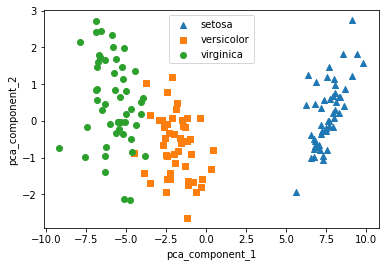

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns =['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로
markers = ['^','s','o']

#pca_component_1 을 x축, pca_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
  x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

##**SVD(Singular Value Decomposition)**
###**SVD 개요**
- 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 잇음, 특이값 분해
- $A=UΣV^T$
- mxn 행렬 A를 위와 같이 분해하는 것 의미
- 행렬 U, V에 속한 벡터는 특이벡터, 모든 특이 벡터는 서로 직교하는 성질 가짐, $\Sigma$는 대각행렬이며 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0, 0이 아닌 값이 행렬A의 특이 값
- Truncated SVD 는 $\Sigma$의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U,V의 원소도 함께 제거헤 더욱 차원을 줄인 형태로 분해하는 것

In [1]:
#넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

#4X4 랜덤 행렬 생성 - 의존성 없애기 위해
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [2]:
U, Sigma, Vt = svd(a) #원본행렬 입력하면 U 행렬, V 행렬, V 전치 행렬 반환
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix : \n',np.round(U, 3))
print('Sigma Value : \n', np.round(Sigma, 3))  # 시그매 행렬의 경우 행렬의 대각에 위치한 0이 아닌 값의 경우만 1차원 행렬로 표현
print('V transpose matrix : \n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix : 
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value : 
 [3.423 2.023 0.463 0.079]
V transpose matrix : 
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [3]:
#Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [4]:
#로우 간 의존성 있을 경우 어떻게 Sigma값이 변하고, 이에 따른 차언 축소가 진행될 수 있는지 알아봄
#일부러 의존성 부여
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [5]:
#다시 SVD를 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value : \n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value : 
 [2.663 0.807 0.    0.   ]


- 이전과 차원은 같지만 Sigma 값 중 2개가 0으로 변함 - 선형 독립인 로우 벡터의 개수가 2개

In [6]:
#U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])
#V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
#U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


- Truncated SVD : 시그마 행렬에 있는 대각 원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식
  - 인위적으로 더 작은 차원으로 분해하기 때문에 원본 행렬을 정확하게 다시 복원할 수는 없음 - 상당히 근사 가능
  - scypi.sparse.linalg.svds 이용

In [7]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

#원본 행렬을 출력하고 SVD를 적용할 경우 , U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬 : \n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원 : ', U.shape, Sigma.shape, Vt.shape)
print('\nSigm값 행렬 : ', Sigma)

#Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원 : ', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬 : ', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) #결과

print('\nTruncated SVD로 분해 후 복원 행렬 : \n', matrix_tr)

원본 행렬 : 
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원 :  (6, 6) (6,) (6, 6)

Sigm값 행렬 :  [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원 :  (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬 :  [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬 : 
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 

###**사이킷런 TruncatedSVD 클래스를 이용한 변환**
- 사이파이의 svds와 같이 연산을 수행해 원본 행렬을 분해한 U, Sigma, Vt 행렬을 반환하지는 않음
- fit() 과 transform()을 호출해 원본 데이터를 몇 개의 주요 컴포넌트로 차원을 축소해 변환
- 원본 데이터를 Truncated SVD 방식으로 분해된 U*Sigma 행렬에 선형 변환해 생성

Text(0, 0.5, 'TruncatedSVd Component 2')

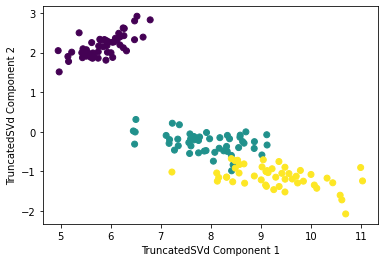

In [8]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
#2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

#산점도 2차원으로 TruncatedSVD 변환된 데이터 표현
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVd Component 1')
plt.ylabel('TruncatedSVd Component 2')

Text(0.5, 1.0, 'PCA Transformed')

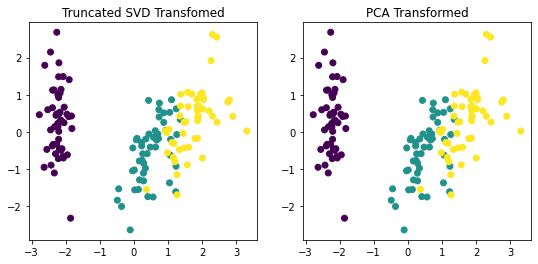

In [11]:
from sklearn.preprocessing import StandardScaler

#붓꽃 데이터를 StandardScalerf로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

#스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

#스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

#TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transfomed')
ax2.set_title('PCA Transformed')

In [12]:
#두 개의 변환 행렬 값과 속성별 컴포넌트 비율값을 실제로 서로 비교해보면 거의 같음을 알 수 잇음
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.339760329927998e-15
4.85722573273506e-17


##**NMF(Non-Negative Matrix Factorization)**
###**NMF 개요**
- 낮은 랭크를 통한 행렬 근사 방식의 변형
- 원본 행렬 내의 모든 원소 값이 모두 양수라는 게 보장되면 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법
- 분해될 행렬은 잠재 요소를 특성으로 가지게 됨

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


Text(0, 0.5, 'NMF component 2')

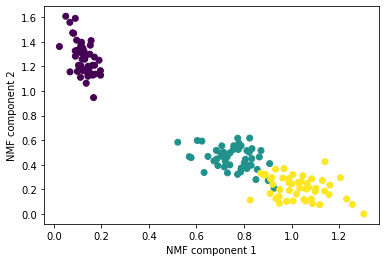

In [14]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF component 1')
plt.ylabel('NMF component 2')